# Notebook 23: Inference in Multiple Linear Regression 
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [2]:
import numpy as np 
from scipy import stats
import statsmodels.api as sm 
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - The Problem of Multiple Comparisons 
*** 

In this exercise we'll explore the **Problem of Multiple Comparisons**.  In multiple linear regression, the PMC rears its ugly head when you try to perform inference on a large number of parameters based on a single data set.

In particular, it tells us that if we look for a statistically significant relationship between a large number of features of a dataset and the response, we're very likely to find evidence that $\color{red}{\text{at least one of the features is important just by random chance}}$, even in the case that none of the features are important. $\color{blue}{\text{This is what motivates us to use things like the full and partial $F$-tests instead.}}$ 

We'll explore this phenomenon using the data in pmc_data.csv. The data contains $n=200$ observations for a response $y$ and $p=20$ features $X_1, X_2, \ldots, X_{20}$.  Load this data into a Pandas DataFrame. 

In [3]:
dfPMC = pd.read_csv("pmc_data.csv")
dfPMC.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,2.737697,2.488435,1.887894,0.037353,1.639701,1.419009,0.101901,1.483266,0.804555,0.930170,...,2.482633,2.355615,0.642479,3.851602,0.573005,2.260237,0.655312,2.323467,0.740312,1.188648
1,-2.060299,1.750911,0.811138,0.571626,2.343696,0.702571,3.713269,0.366964,0.234172,1.379765,...,1.193246,1.165506,0.766173,0.234528,0.976693,1.650476,0.852885,2.178888,0.438472,0.865781
2,-1.001194,3.141434,0.895804,1.160973,2.047303,2.501465,1.932058,0.697282,0.400128,2.915288,...,0.210874,1.070302,0.751022,2.676697,0.167176,1.456459,0.672682,0.972043,2.292891,0.211013
3,-1.347879,3.119903,1.565272,1.861573,1.806319,0.295549,1.568728,0.960963,0.493314,4.649757,...,0.442146,1.548280,0.055933,0.503651,0.080741,0.257804,0.305269,0.430674,1.759105,0.611828
4,6.085894,1.090370,1.148386,0.677994,2.974993,0.615081,3.357223,1.287853,0.501881,0.286477,...,1.477053,2.497704,0.618649,2.430604,0.226835,2.739550,0.497371,0.857221,3.967444,1.532375


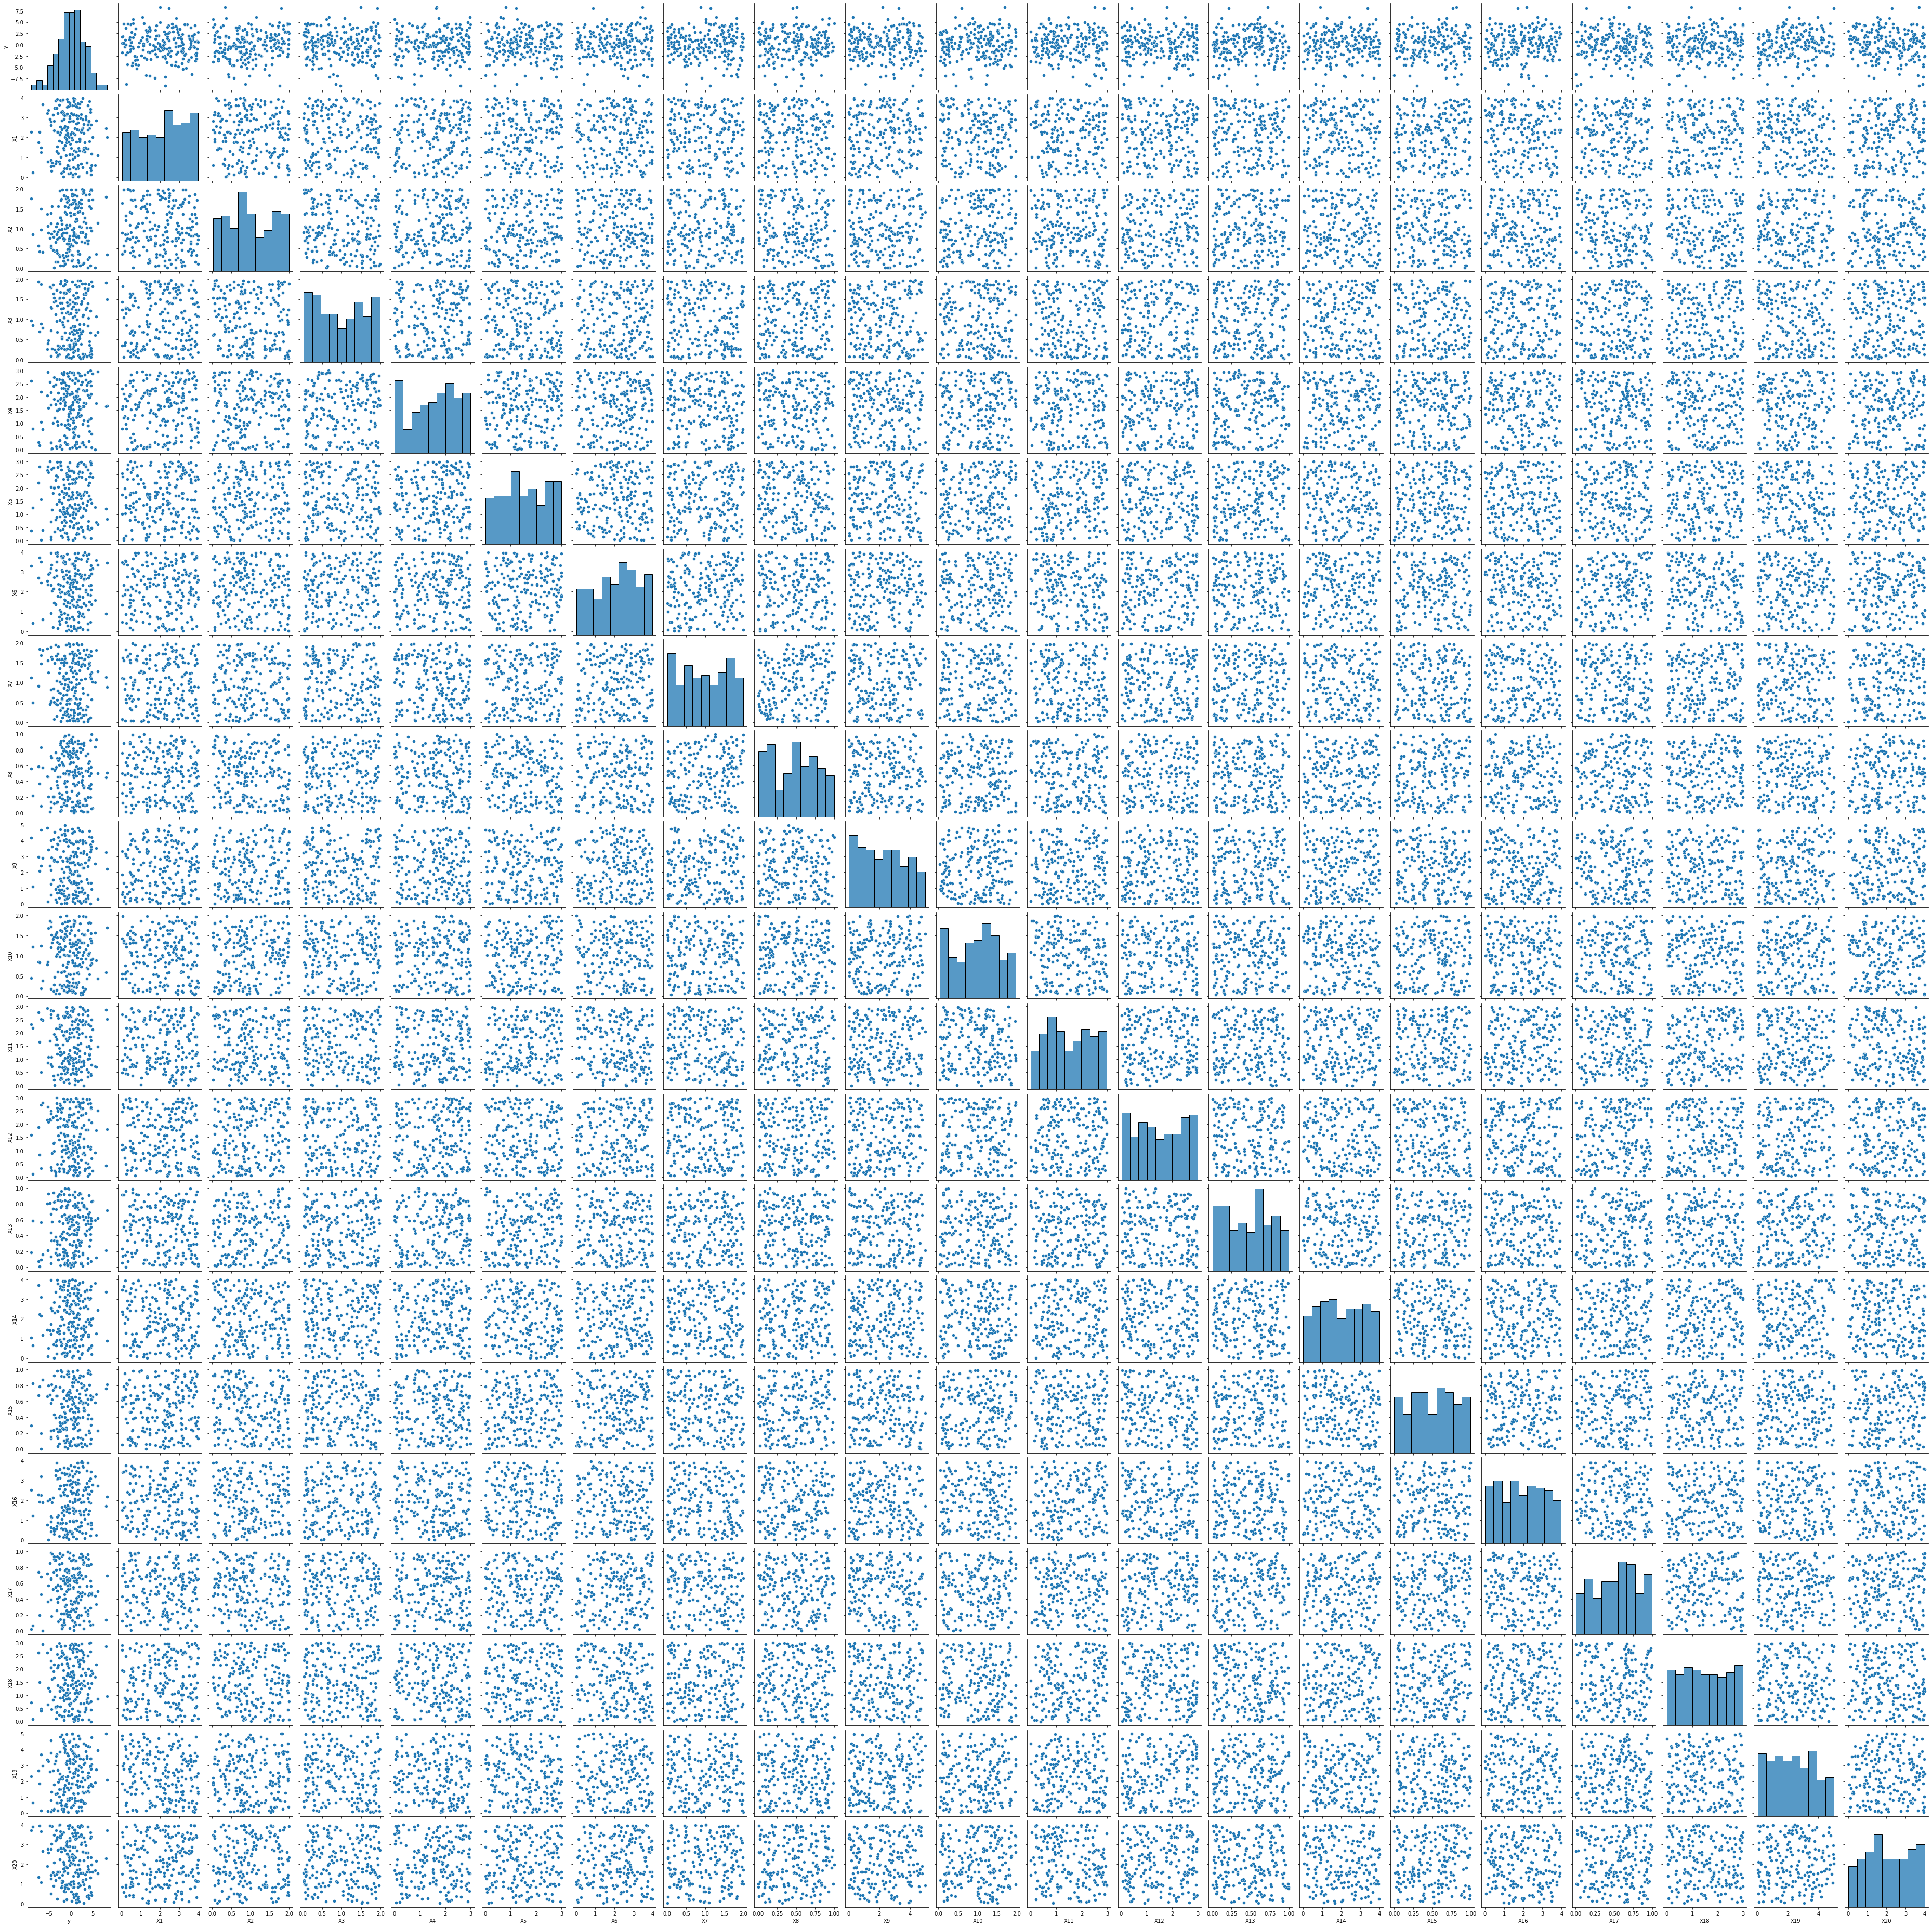

In [5]:
import seaborn
seaborn.pairplot(dfPMC)


**Part A**: Let's start by doing some $\color{red}{\text{graphical exploration}}$.  To look for relationships between an individual feature and the response we can make scatter plots.  Try several different features and see if any of them looks like they have a real relationship with the response. 

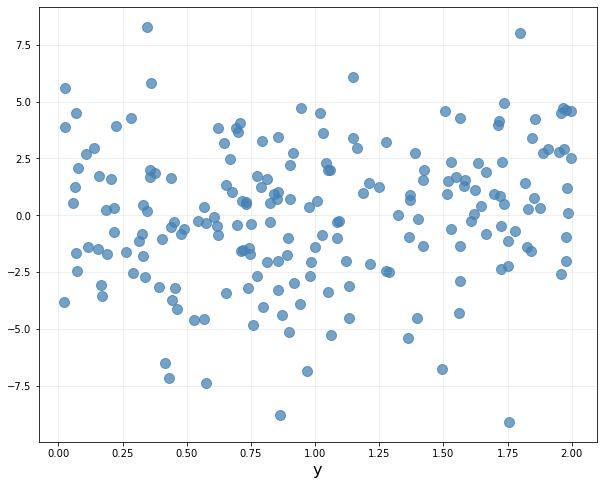

In [7]:
# Extract the response and a single feature 
#y, xk = dfPMC["y"], dfPMC["X1"]
y, xk = dfPMC["y"], dfPMC["X2"]
#y, xk = dfPMC["y"], dfPMC["X3"]
#y, xk = dfPMC["y"], dfPMC["X4"]
#y, xk = dfPMC["y"], dfPMC["X5"]
#y, xk = dfPMC["y"], dfPMC["X6"]
#y, xk = dfPMC["y"], dfPMC["X7"]
#y, xk = dfPMC["y"], dfPMC["X8"]
#y, xk = dfPMC["y"], dfPMC["X9"]
#y, xk = dfPMC["y"], dfPMC["X10"]
#y, xk = dfPMC["y"], dfPMC["X11"]
#y, xk = dfPMC["y"], dfPMC["X12"]
#y, xk = dfPMC["y"], dfPMC["X13"]
#y, xk = dfPMC["y"], dfPMC["X14"]
#y, xk = dfPMC["y"], dfPMC["X15"]
#y, xk = dfPMC["y"], dfPMC["X16"]
#y, xk = dfPMC["y"], dfPMC["X17"]
#y, xk = dfPMC["y"], dfPMC["X18"]
#y, xk = dfPMC["y"], dfPMC["X19"]
#y, xk = dfPMC["y"], dfPMC["X20"]

# Make Scatterplot 
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
ax.scatter(xk, y, color="steelblue", s=100, alpha=0.75)
ax.set_xlabel("x",fontsize=16)
ax.set_xlabel("y",fontsize=16)
ax.grid(alpha=0.25)

It does not appear that any of the features are related to the response. 

**Part B**: Did you find any relevant relationships?  Probably not; because there aren't any.  In fact, the response $y$ was generated using the model 

$$
Y = \epsilon \quad \textrm{where} \quad \epsilon \sim N(0,\sigma^2)
$$

OK, but $\color{red}{\text{pretend we don't know this}}$.  Let's construct a multiple linear regression on the data and examine the hypothesis tests for the individual parameters provided by statsmodel's summary feature. 

In [4]:
# Extract response vector y and feature matrix X from DataFrame
y, X = dfPMC["y"], dfPMC.iloc[:,1:]
# X is every row including every column except column 0 which is the y column

# Add constant column to X 
X = sm.add_constant(X)
# this adds an initial column containing just 1.

# Fit OLS model 
#OLS is the regression model for SLR. OLS, "Ordinary Least Squares"
model = sm.OLS(y, X).fit() 

# Print model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.091
Date:                Thu, 17 Nov 2022   Prob (F-statistic):              0.363
Time:                        10:33:13   Log-Likelihood:                -494.10
No. Observations:                 200   AIC:                             1030.
Df Residuals:                     179   BIC:                             1099.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0228      1.669     -1.811      0.072      -6.316       0.271
X1             0.1290      0.193      0.667      0.505      -0.253       0.511
X2             0.8485      0.393      2.161      0.032       0.074       1.623
X3             0.0875      0.362      0.241      0.810      -0.628       0.803
X4             0.2407      0.250      0.964      0.336      -0.252       0.733
X5            -0.0026      0.264     -0.010      0.992      -0.524       0.519
X6            -0.0695      0.199     -0.348      0.728      -0.463       0.324
X7             0.0697      0.382      0.182      0.855      -0.684       0.824
X8             0.3106      0.778      0.399      0.690      -1.225       1.846
X9            -0.1158      0.156     -0.744      0.458      -0.423       0.191
X10            0.1997      0.399      0.501      0.617      -0.587       0.986
X11           -0.2047      0.267     -0.768      0.444      -0.731       0.321
X12           -0.0594      0.246     -0.242      0.809      -0.544       0.426
X13            0.7455      0.780      0.956      0.340      -0.793       2.284
X14            0.1328      0.192      0.691      0.490      -0.246       0.512
X15            0.5934      0.794      0.748      0.456      -0.973       2.160
X16            0.3255      0.195      1.670      0.097      -0.059       0.710
X17           -0.0418      0.810     -0.052      0.959      -1.641       1.557
X18            0.1165      0.253      0.460      0.646      -0.383       0.616
X19            0.4163      0.160      2.609      0.010       0.101       0.731
X20           -0.3818      0.196     -1.947      0.053      -0.769       0.005
==============================================================================
Omnibus:                        1.082   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.744
Skew:                          -0.058   Prob(JB):                        0.689
Kurtosis:                       3.276   Cond. No.                         57.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Part C**: Examine the p-values and 95% confidence intervals associated with each model parameter.  Do the tests indicate that any of the features have a statistically significant relationship with the response?

Also, did you notice that $R^2$ and adj-$R^2$ were quite different values? So what? What does the difference indicate?

Solution:

The computed p-values associated with $X_2$ and $X_{19}$ are below the $\alpha = 0.05$ significance level, despite the fact that there is no such relationship in the model.This is an illustration of the **Problem of Multiple Comparisons**.

Since there is a Type 1 error rate of $\alpha = 0.05$ associated with each test, the fact that we perform many such tests makes it extremely likely that at least one feature will incorrectly appear as important just due to random chance.

The large difference between $R^2$ and adj-$R^2$ indicates the addition of nonsense variables.

**Part D**: Now, look at the $F$-statistic and associated p-value for the MLR model.  Do these values indicate that at least one of the features has a statistically significant relationship with the response? How can you reconcile the result of **Part C** with this result? 

Solution:

The $F$-statistic is $F = 1.091$ and has an associated p-value of $0.363$.  Since this p-value is above $\alpha = 0.05$ we fail to reject the null hypothesis and conclude that none of the features have an effect on the response. 